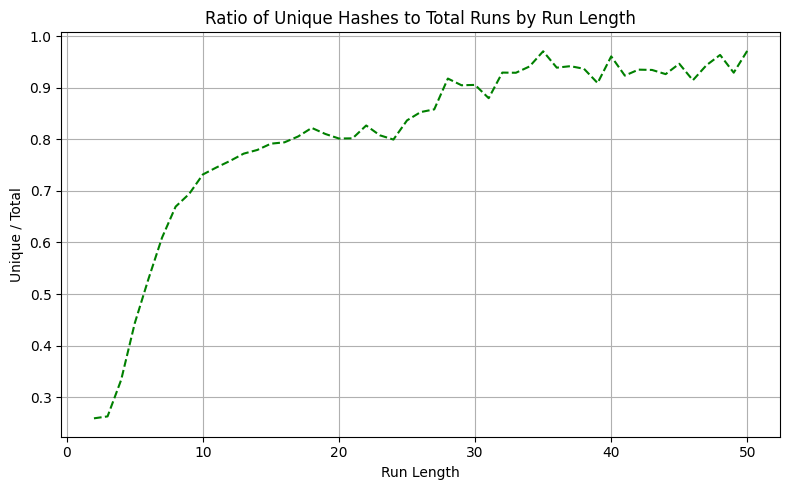

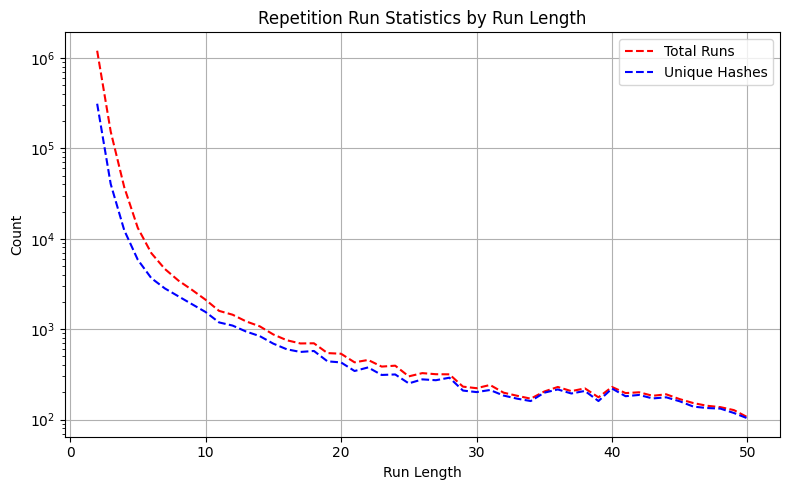

In [22]:
import psycopg
import matplotlib.pyplot as plt

conn = psycopg.connect(
    dbname="sentence_db", 
    user="jonny", 
    password="buolamwini", 
    host="localhost", 
    port=5432
)

limit = 50

ratio_data = {}
totals = {}
uniques = {}

for x in range(2, limit + 1):  # run lengths 2 to 10
    with conn.cursor() as cur:
        cur.execute("""
            SELECT COUNT(*) FROM repetition_runs WHERE run_length = %s
        """, (x,))
        total = cur.fetchone()[0]

        if total == 0:
            continue  # skip this run length entirely

        cur.execute("""
            SELECT COUNT(DISTINCT hash) FROM repetition_runs WHERE run_length = %s
        """, (x,))
        unique = cur.fetchone()[0]

        ratio = unique / total
        ratio_data[x] = ratio
        
        totals[x] = total
        uniques[x] = unique

conn.close()

# Plot
ratio_x_vals = list(ratio_data.keys())
ratio_y_vals = list(ratio_data.values())

plt.figure(figsize=(8, 5))
plt.plot(ratio_x_vals, ratio_y_vals, color="green", linestyle="--")

plt.title("Ratio of Unique Hashes to Total Runs by Run Length")
plt.xlabel("Run Length")
plt.ylabel("Unique / Total")
plt.grid(True)
plt.tight_layout()
plt.show()

# Prepare x and y values
x_vals = list(totals.keys())
total_y_vals = [totals[x] for x in x_vals]
unique_y_vals = [uniques[x] for x in x_vals]

# Plot
plt.figure(figsize=(8, 5))

# Plot total and unique lines
plt.plot(x_vals, total_y_vals, label="Total Runs", color="red", linestyle="--")
plt.plot(x_vals, unique_y_vals, label="Unique Hashes", color="blue", linestyle="--")

plt.yscale("log")

plt.title("Repetition Run Statistics by Run Length")
plt.xlabel("Run Length")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

